# Capstone Project

# to be done:
- loss ananlysis
    - by shops
    - by items
    - by cata
    - by shop-item

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns



import matplotlib
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

from textwrap import wrap

pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option('display.max_colwidth', None)

import pickle
import time
import datetime

#import googletrans
#from googletrans import Translator
#to avoid instantiate too many translator, we created one instance for the whole notebook
#translator = Translator()

In [2]:
#!pip install googletrans==3.1.0a0

# define functions

In [3]:
def import_data(path):
    df = pd.read_csv(path)
    
    print("printing dataframe shape")
    print(df.shape)
    
    print("\n\nprinting dataframe info")
    df.info()
    
    print("\n\nprinting first 5 rows")
    print(df.head())
    
    print("\n\nprinting descriptive statistics")
    print(df.describe())
    
    print("\n\nprinting null value summary")
    print(df.isnull().sum())
    return df

# Data Import and basic clean

### df_items

In [4]:
path = "../datasets/items_en.csv"
df_items = import_data(path)

printing dataframe shape
(22170, 3)


printing dataframe info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


printing first 5 rows
                                                     item_name  item_id  \
0                          ! IN THE POWER OF GLAMOR (PLAST.) D        0   
1  !ABBYY FineReader 12 Professional Edition Full [PC Digital]        1   
2                             *** IN THE RAYS OF GLORY (UNV) D        2   
3                                        ***BLUE WAVE (Univ) D        3   
4                                             ***BOX (GLASS) D        4   

   item_category_id  
0                40  
1                76  
2      

In [5]:
#df_items['item_id'] = pd.to_numeric(df_items['item_id'], downcast='signed')
#df_items['item_category_id'] = pd.to_numeric(df_items['item_category_id'], downcast='signed')
#df_items.info()

### df_shops

In [6]:
path = "../datasets/shops_en.csv"
df_shops = import_data(path)

printing dataframe shape
(60, 2)


printing dataframe info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


printing first 5 rows
                                  shop_name  shop_id
0         !Yakutsk Ordzhonikidze, 56 francs        0
1  !Yakutsk shopping center "Central" franc        1
2             Adygea shopping center "Mega"        2
3          Balashikha SEC "October-Kinomir"        3
4     Volzhsky shopping center "Volga Mall"        4


printing descriptive statistics
       shop_id
count    60.00
mean     29.50
std      17.46
min       0.00
25%      14.75
50%      29.50
75%      44.25
max      59.00


printing null value summary
shop_name    0
shop_id      0
dtype: int64


In [7]:
#df_shops['shop_id'] = pd.to_numeric(df_shops['shop_id'], downcast='signed')
#df_shops.info()


### df_cat

In [8]:
path = "../datasets/item_categories_en.csv"
df_cat = import_data(path)

printing dataframe shape
(84, 2)


printing dataframe info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


printing first 5 rows
         item_category_name  item_category_id
0  PC - Headsets/Headphones                 0
1         Accessories - PS2                 1
2         Accessories - PS3                 2
3         Accessories - PS4                 3
4         Accessories - PSP                 4


printing descriptive statistics
       item_category_id
count             84.00
mean              41.50
std               24.39
min                0.00
25%               20.75
50%               41.50
75%               62.25
max               83.00


printing null value summary
item_category_nam

In [9]:
#df_cat['item_category_id'] = pd.to_numeric(df_cat['item_category_id'], downcast='signed')
#df_cat.info()

In [10]:
cat_item_list=df_items.groupby('item_category_id')['item_id'].unique().tolist()
df_cat['unique_item_num']=[len(cat_item_list[i].tolist()) for i in range(len(cat_item_list))]

<AxesSubplot:>

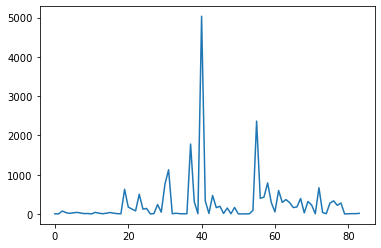

In [11]:
df_cat['unique_item_num'].plot()

### df_train

In [12]:
path = "../datasets/sales_train.csv"
df_train = import_data(path)

printing dataframe shape
(2935849, 6)


printing dataframe info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


printing first 5 rows
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00          1.00
1  03.01.2013               0       25     2552      899.00          1.00
2  05.01.2013               0       25     2552      899.00         -1.00
3  06.01.2013               0       25     2554    1,709.05          1.00
4  15.01.2013               0       25     2555    1,099.00          1.00


printing descriptive statistics
       date_block_num     

In [13]:
#action
df_train['date']=pd.to_datetime(df_train['date'],format="%d.%m.%Y")
#df_train['year_month'] = df_train['date'].dt.to_period('M')
#df_train['month'] = df_train['date'].dt.month
#df_train = df_train.drop(columns=['date'])

In [14]:
df_train.tail()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2935844,2015-10-10,33,25,7409,299.00,1.00
2935845,2015-10-09,33,25,7460,299.00,1.00
2935846,2015-10-14,33,25,7459,349.00,1.00
2935847,2015-10-22,33,25,7440,299.00,1.00
2935848,2015-10-03,33,25,7460,299.00,1.00


In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   shop_id         int64         
 3   item_id         int64         
 4   item_price      float64       
 5   item_cnt_day    float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB


In [16]:
"""
df_train['date_block_num'] = pd.to_numeric(df_train['date_block_num'], downcast='signed')
df_train['shop_id'] = pd.to_numeric(df_train['shop_id'], downcast='signed')
df_train['item_id'] = pd.to_numeric(df_train['item_id'], downcast='signed')
df_train['item_price'] = pd.to_numeric(df_train['item_price'], downcast='float')
df_train['item_cnt_day'] = pd.to_numeric(df_train['item_cnt_day'], downcast='float')
"""

"\ndf_train['date_block_num'] = pd.to_numeric(df_train['date_block_num'], downcast='signed')\ndf_train['shop_id'] = pd.to_numeric(df_train['shop_id'], downcast='signed')\ndf_train['item_id'] = pd.to_numeric(df_train['item_id'], downcast='signed')\ndf_train['item_price'] = pd.to_numeric(df_train['item_price'], downcast='float')\ndf_train['item_cnt_day'] = pd.to_numeric(df_train['item_cnt_day'], downcast='float')\n"

In [17]:
# merge df_train and df_items
df_train = df_train.merge(df_items, left_on='item_id', right_on='item_id', how='left' )
df_train = df_train.drop(columns=['item_name'])
df_train.shape

(2935849, 7)

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 7 columns):
 #   Column            Dtype         
---  ------            -----         
 0   date              datetime64[ns]
 1   date_block_num    int64         
 2   shop_id           int64         
 3   item_id           int64         
 4   item_price        float64       
 5   item_cnt_day      float64       
 6   item_category_id  int64         
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 179.2 MB


In [19]:
df_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
0,2013-01-02,0,59,22154,999.00,1.00,37
1,2013-01-03,0,25,2552,899.00,1.00,58
2,2013-01-05,0,25,2552,899.00,-1.00,58
3,2013-01-06,0,25,2554,"1,709.05",1.00,58
4,2013-01-15,0,25,2555,"1,099.00",1.00,56


### df_test

In [20]:

path = "../datasets/test.csv"
df_test = import_data(path)

printing dataframe shape
(214200, 3)


printing dataframe info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB


printing first 5 rows
   ID  shop_id  item_id
0   0        5     5037
1   1        5     5320
2   2        5     5233
3   3        5     5232
4   4        5     5268


printing descriptive statistics
              ID    shop_id    item_id
count 214,200.00 214,200.00 214,200.00
mean  107,099.50      31.64  11,019.40
std    61,834.36      17.56   6,252.64
min         0.00       2.00      30.00
25%    53,549.75      16.00   5,381.50
50%   107,099.50      34.50  11,203.00
75%   160,649.25      47.00  16,071.50
max   214,199.00      59.00  22,167.00


printing null value summary
ID         0
shop_id 

In [21]:
#action
#df_test['date'] = datetime.date(2015, 11, 30)
#df_test['date']=pd.to_datetime(df_test['date'])
#df_test['year_month'] = df_test['date'].dt.to_period('M')
#df_test['month'] = df_test['date'].dt.month
df_test['date_block_num'] = 34
#df_test = df_test.drop(columns=['date'])

In [22]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   ID              214200 non-null  int64
 1   shop_id         214200 non-null  int64
 2   item_id         214200 non-null  int64
 3   date_block_num  214200 non-null  int64
dtypes: int64(4)
memory usage: 6.5 MB


In [23]:
"""
df_test['shop_id'] = pd.to_numeric(df_test['shop_id'], downcast='signed')
df_test['item_id'] = pd.to_numeric(df_test['item_id'], downcast='signed')
df_test.info()
"""

"\ndf_test['shop_id'] = pd.to_numeric(df_test['shop_id'], downcast='signed')\ndf_test['item_id'] = pd.to_numeric(df_test['item_id'], downcast='signed')\ndf_test.info()\n"

In [24]:
# merge df_test and df_items
df_test = df_test.merge(df_items, left_on='item_id', right_on='item_id', how='left' )
df_test = df_test.set_index('ID',drop=False)
df_test = df_test.drop(columns=['item_name'])
df_test.shape

(214200, 5)

In [25]:
# produce lists of shops, items and item_categories in df_test for future filtering
test_shop_list = sorted(df_test['shop_id'].unique().tolist())
#print(test_shop_list)
test_item_list = sorted(df_test['item_id'].unique().tolist())
#print(test_item_list)
test_cat_list = sorted(df_test['item_category_id'].unique().tolist())
print(test_cat_list)

[0, 2, 3, 5, 6, 7, 9, 11, 12, 15, 16, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 47, 49, 54, 55, 56, 57, 58, 60, 61, 62, 63, 64, 65, 67, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 83]


# EDA and further data clean

### df_train

In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 7 columns):
 #   Column            Dtype         
---  ------            -----         
 0   date              datetime64[ns]
 1   date_block_num    int64         
 2   shop_id           int64         
 3   item_id           int64         
 4   item_price        float64       
 5   item_cnt_day      float64       
 6   item_category_id  int64         
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 179.2 MB


<AxesSubplot:xlabel='Count', ylabel='date_block_num'>

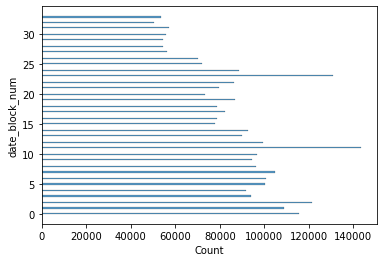

In [27]:

sns.histplot(data=df_train, y='date_block_num')

In [28]:
#sns.pairplot(df_train)

### handle outliers


**'item_price'**

<AxesSubplot:xlabel='item_price'>

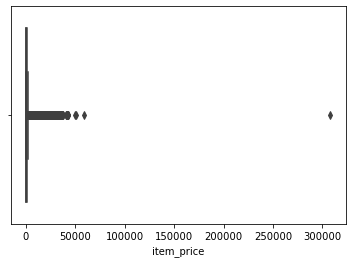

In [29]:
sns.boxplot(data=df_train, x="item_price")

In [30]:
df_train.query("item_price > 100_000 | item_price < 0")

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
484683,2013-05-15,4,32,2973,-1.00,1.00,19
1163158,2013-12-13,11,12,6066,"307,980.00",1.00,75


In [31]:
df_train.query("item_id==6066 | item_id== 2973")

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
352,2013-01-15,0,25,2973,"2,499.00",13.00,19
353,2013-01-16,0,25,2973,"2,499.00",5.00,19
354,2013-01-17,0,25,2973,"2,499.00",3.00,19
355,2013-01-18,0,25,2973,"2,499.00",2.00,19
356,2013-01-19,0,25,2973,"2,499.00",3.00,19
357,2013-01-20,0,25,2973,"2,499.00",1.00,19
358,2013-01-21,0,25,2973,"2,499.00",1.00,19
359,2013-01-22,0,25,2973,"2,499.00",2.00,19
360,2013-01-24,0,25,2973,"2,499.00",2.00,19
361,2013-01-25,0,25,2973,"2,499.00",2.00,19


In [32]:
#action
#impute the negative price with the price with same item_id from other records
df_train.at[484683,'item_price']=2499
df_train.iloc[484683,:]

date                2013-05-15 00:00:00
date_block_num                        4
shop_id                              32
item_id                            2973
item_price                     2,499.00
item_cnt_day                       1.00
item_category_id                     19
Name: 484683, dtype: object

In [33]:
print("the item_id 6066 seems abnormal, to be deteted")

the item_id 6066 seems abnormal, to be deteted


**'item_cnt_day'**

<AxesSubplot:xlabel='item_cnt_day'>

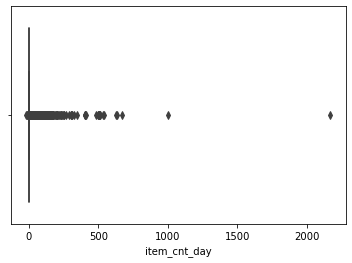

In [34]:
sns.boxplot(data=df_train, x="item_cnt_day")

In [35]:
df_train.query("item_cnt_day > 900")

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
2326930,2015-01-15,24,12,20949,4.00,"1,000.00",71
2909818,2015-10-28,33,12,11373,0.91,"2,169.00",9


In [36]:
df_items.query("item_id==20949 | item_id==11373 ")

,item_name,item_id,item_category_id
11373,Delivery to the point of issue (Boxberry),11373,9
20949,Corporate package T-shirt 1C Interest white (34*42) 45 microns,20949,71


In [37]:
print("both records above might be of some events or promotions. they might impact our model,  we just delete these first")

both records above might be of some events or promotions. they might impact our model,  we just delete these first


In [38]:
#action
#to be used in pre-process
index_to_delete=[1163158,2326930,2909818]
df_train = df_train.drop(index_to_delete)

****************************************************

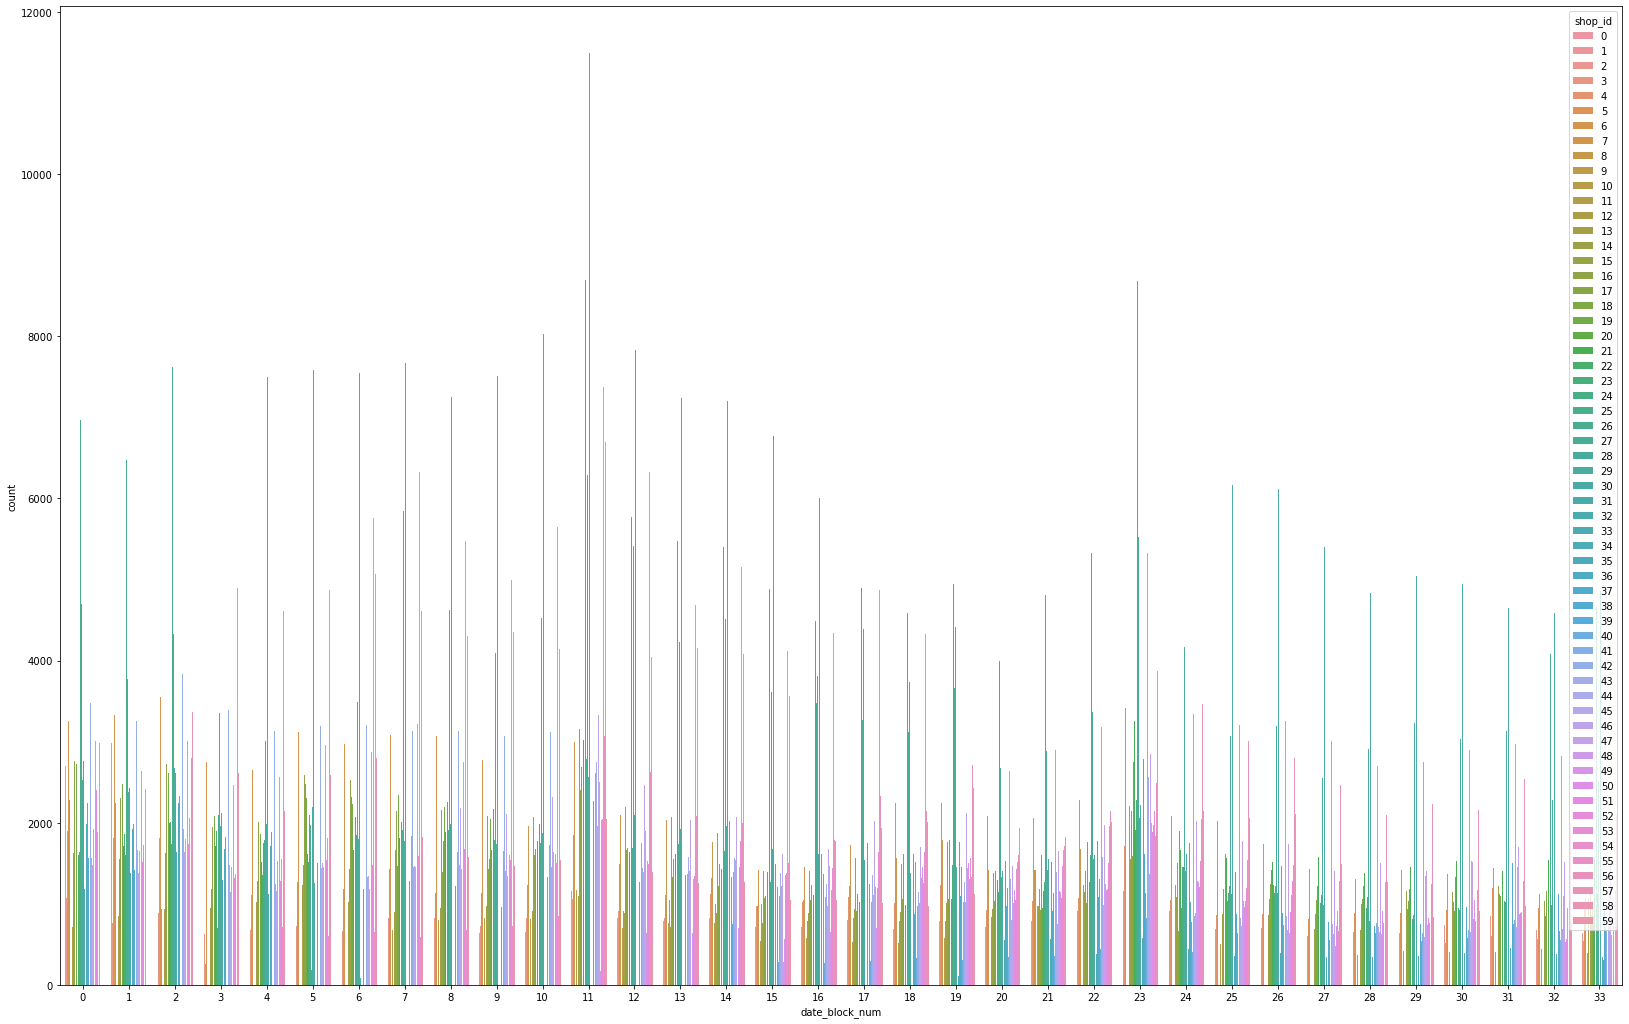

In [39]:

plt.figure(figsize=(28,18))
sns.countplot(data=df_train, x='date_block_num', hue='shop_id')
plt.show()

### produce the monthly training data set

In [40]:
agg_dict={'date':'first',
          #'month':'last',
           #'date_block_num':'first',
           #'shop_id':'first',
           #'item_id':'first',
           'item_price': 'mean',
           'item_cnt_day': "sum"
           
          }
df_train_m = df_train.groupby(['date_block_num','shop_id', 'item_category_id','item_id']).agg(agg_dict)
#df_train_m = df_train_m.drop(columns=['date'])
df_train_m.reset_index(inplace=True)

In [41]:
df_train_m.head(100)

,date_block_num,shop_id,item_category_id,item_id,date,item_price,item_cnt_day
0,0,0,2,5572,2013-01-04,"1,322.00",10.00
1,0,0,2,5573,2013-01-12,560.00,1.00
2,0,0,2,5575,2013-01-06,806.00,4.00
3,0,0,2,5576,2013-01-28,"2,231.00",5.00
4,0,0,2,5609,2013-01-08,"2,381.00",1.00
5,0,0,2,5612,2013-01-29,"3,623.00",1.00
6,0,0,2,5623,2013-01-18,294.00,1.00
7,0,0,2,5627,2013-01-18,"2,060.00",2.00
8,0,0,2,5629,2013-01-03,"1,925.00",9.00
9,0,0,2,5630,2013-01-18,"2,060.00",1.00


<AxesSubplot:xlabel='date_block_num'>

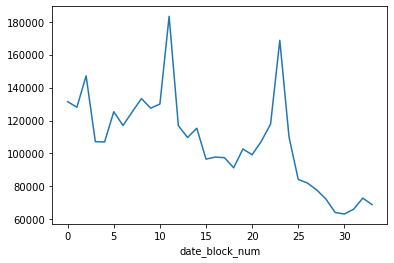

In [42]:
df_train_m.groupby('date_block_num')['item_cnt_day'].sum().plot()

<AxesSubplot:xlabel='shop_id'>

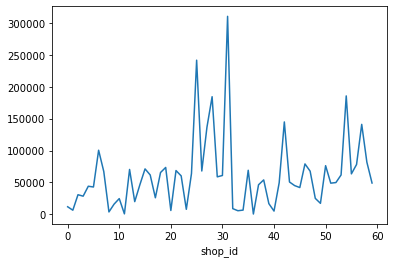

In [43]:
df_train_m.groupby('shop_id')['item_cnt_day'].sum().plot()

### concate df_train_m and df_test

In [44]:
#action

#merge df_train and df_test
df_all = pd.concat([df_train_m,df_test], axis=0, ignore_index=True)

#change column name
df_all.rename(columns = {'item_cnt_day':'item_cnt_month'}, inplace = True)

#drop column 'ID'
df_all.drop(columns=['ID','date'],inplace = True)

#fill null value, and convert datatype
#df_all['test_ID'] = df_all['test_ID'].fillna(-1).astype(int)
df_all['item_cnt_month'] = df_all['item_cnt_month'].fillna(0).astype(int)


#fill null values of 'item_price' with last valid price of the same item
df_all = pd.concat([
                    df_all['item_id'],
                    df_all.groupby(['item_id']).fillna(method='ffill')
                    ], axis=1)

df_all.isnull().sum()

item_id                 0
date_block_num          0
shop_id                 0
item_category_id        0
item_price          15246
item_cnt_month          0
dtype: int64

In [45]:
print(df_all[df_all['item_price'].isnull()==True]['date_block_num'].unique())

[34]


In [46]:
print("there are some new arrival items that have no sold record, thus no item_price")

there are some new arrival items that have no sold record, thus no item_price


In [47]:
#action: handle new arrival items
new_arrival_item_list = df_all[df_all['item_price'].isnull()==True]['item_id'].unique()
print("printing new arrival item list:")
print(len(new_arrival_item_list))
print(new_arrival_item_list)


new_arrival_cat_list = df_all[df_all['item_price'].isnull()==True]['item_category_id'].unique()
print('printing categories containing new arrival items')
print(len(new_arrival_cat_list))
print(new_arrival_cat_list)


#create new column to reflect the new arrvial items, which don't have price
df_all["is_new_arrival"] = np.where(df_all['item_id'].isin(new_arrival_item_list), 1, 0)

## set the new arrvial price as 0 first, indicating price not available
df_all['item_price'] = df_all['item_price'].fillna(0)

printing new arrival item list:
363
[ 5320  5268  5826  3538  3571  3604  3407  3408  3405  3984  8551  8822
  8823  8824  8890 10779  9767  8355  8354  6729  6731  6732  6152  6153
  6742  7782  7862  6743  6335 13559 13804 13402 14647 14832 14959  2327
  1732  2322  2323  2326  2569  2966 21467 20400 20401 20836  1580  1585
  1246  1437  2328  2427  2325  3022  1193  1252  1386  1884  1885  1577
  3627  4412  3271  3349 13558 13310 13338 12890 13805 13309 12568 13275
 13251 13303 13250 13249 13232 13242 14648 19773 18913 21397 21708 16051
 16141 16193 15553  1284  5269  6730  3338  4060 11974  7728  7729  7926
  8549  8826  5812  5025  9972 11762  7669 13263 13264  8993  7727 18174
 19219  6863 12117 13209 13273 14521  7592  7607  7646  6903  8545  5322
  4156  5843 11385 13271 10028 10203 16139 22022  3760  3908   640   639
   140   249   428 10507 10045 12469 14784 15665 13745 12802 12961  5844
  6996  7730  8191  6734 20403 20560 20378 20878 16976 19155 21828  1864
 20680  3282  3

In [48]:
df_all.isnull().sum()

item_id             0
date_block_num      0
shop_id             0
item_category_id    0
item_price          0
item_cnt_month      0
is_new_arrival      0
dtype: int64

# to EDA
- x=month, y=item_cnt for each shop
- x=month, y=cat for each shop

- x=month, y=item_cnt for each cat




In [49]:
df_all.describe()

,item_id,date_block_num,shop_id,item_category_id,item_price,item_cnt_month,is_new_arrival
count,"1,823,322.00","1,823,322.00","1,823,322.00","1,823,322.00","1,823,322.00","1,823,322.00","1,823,322.00"
mean,"10,720.74",16.94,32.67,42.10,806.99,2.00,0.01
std,"6,241.45",10.91,16.66,16.44,"1,587.08",7.95,0.09
min,0.00,0.00,0.00,0.00,0.00,-22.00,0.00
25%,"5,070.00",7.00,20.00,30.00,199.00,1.00,0.00
50%,"10,591.00",16.00,31.00,40.00,399.00,1.00,0.00
75%,"16,063.00",26.00,47.00,55.00,899.00,2.00,0.00
max,"22,169.00",34.00,59.00,83.00,"50,999.00","1,644.00",1.00


In [50]:
df_all[df_all['item_cnt_month']<0].sample(10)

,item_id,date_block_num,shop_id,item_category_id,item_price,item_cnt_month,is_new_arrival
984427,11920,18,18,41,"5,299.00",-1,0
1306988,6426,25,12,24,"2,499.00",-1,0
767681,2331,13,35,20,"2,799.00",-1,0
1072019,21968,20,12,67,639.00,-1,0
863368,21446,15,37,38,299.00,-1,0
1046950,1851,19,38,23,0.50,-1,0
388658,19924,6,42,62,999.00,-1,0
1301193,13086,24,58,62,"1,499.00",-1,0
415939,2341,7,12,30,449.00,-2,0
180351,1531,2,56,28,949.00,-1,0


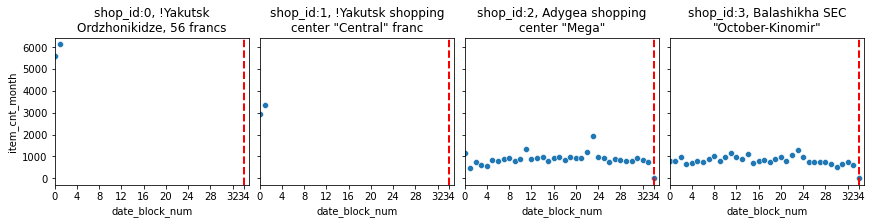

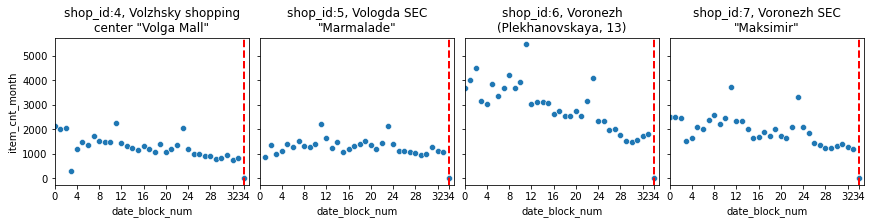

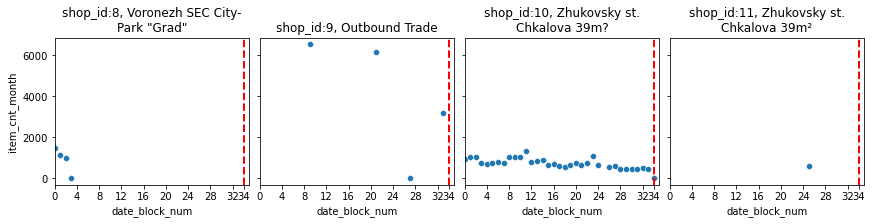

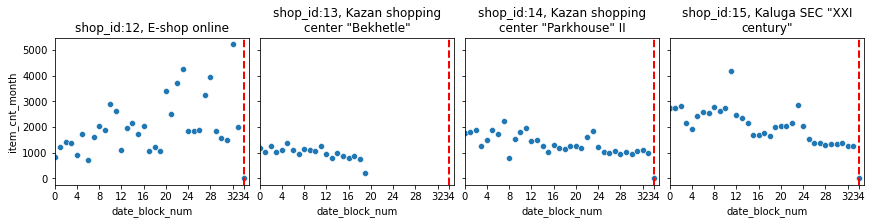

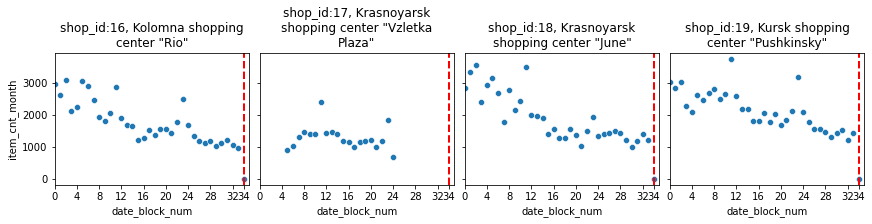

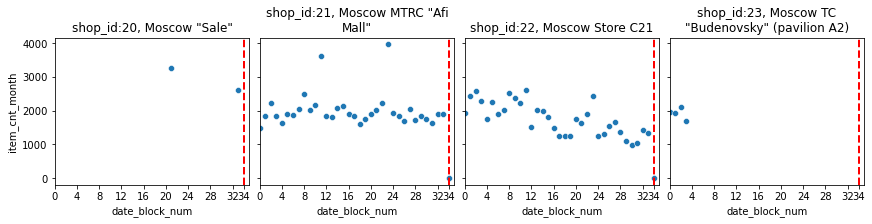

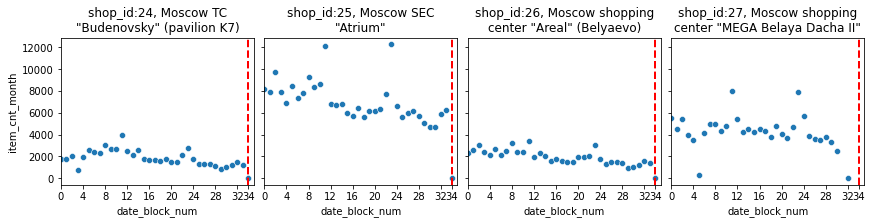

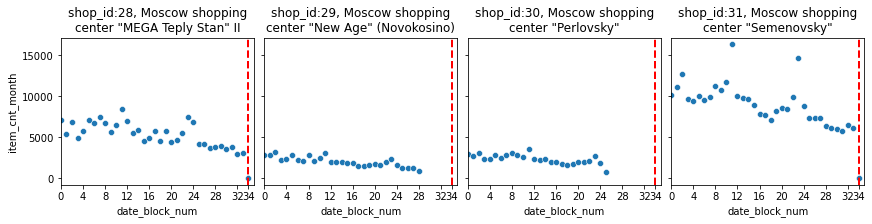

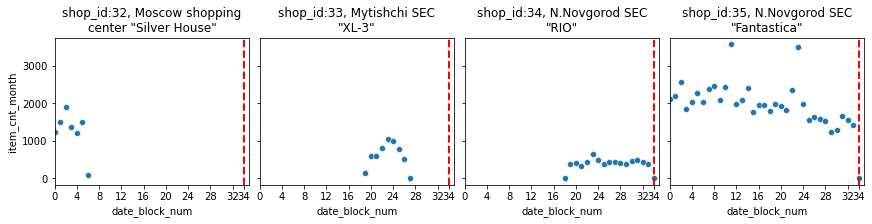

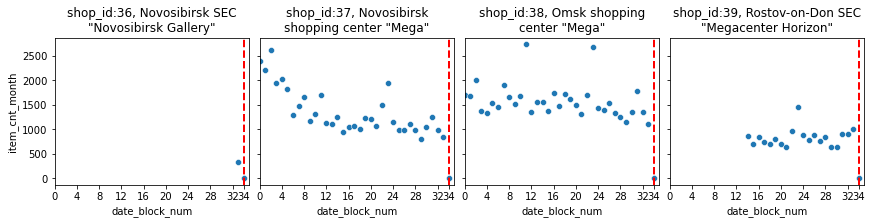

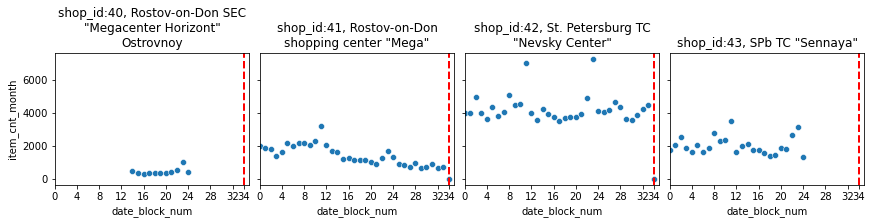

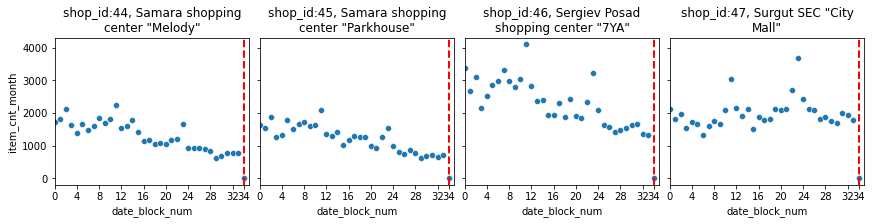

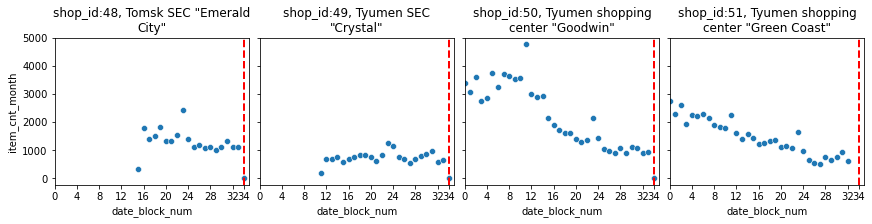

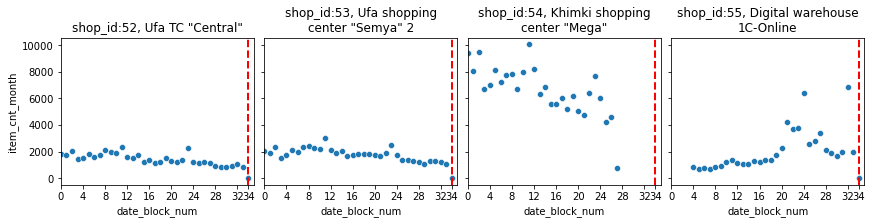

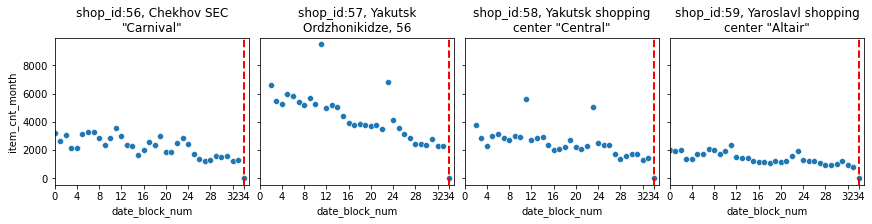

In [51]:
#plot monthly sales for each shop

df_groupby = df_all.groupby('shop_id')
shop_name_list=df_shops['shop_name'].tolist()


x_ticks=[4*x for x in range(9)] + [34]
columns_in_a_row=4    
max_length = 60
i=0
while i < max_length:
    fig, axs = plt.subplots(1, columns_in_a_row,constrained_layout=True, figsize=(12,3), sharey=True, sharex=True)
    for j in range(columns_in_a_row):
            if i+j < max_length:
                df = df_groupby.get_group(i+j).groupby('date_block_num').agg({'item_cnt_month':'sum'})
                sns.scatterplot(data=df,x='date_block_num' ,y='item_cnt_month', ax=axs[j])
                
                #set x-axis
                axs[j].set_xticks(x_ticks)
                axs[j].set_xlim([0, 35])
            
                #plot month 34, which is the month we need to predict
                axs[j].axvline(34, linewidth=2, ls='dashed', c='red')
            
                #print the shope name
                axs[j].set_title("\n".join(wrap(f'shop_id:{i+j}, {shop_name_list[i+j]}', 30)))
           
    i +=columns_in_a_row
    
plt.show()

**Observations**
- many shops seemed closed after running some months
- stable monthly sales in some shops 
- downtrend monthly sales in many shops
- uptrend monthly sales in 2 online shops
- not all shops in test data

ploting monthly sales for each category


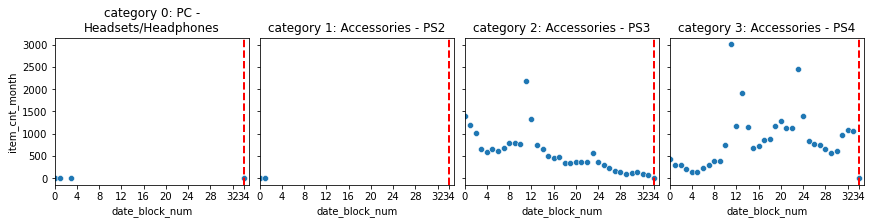

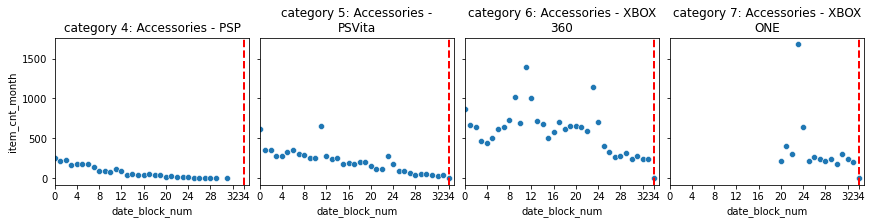

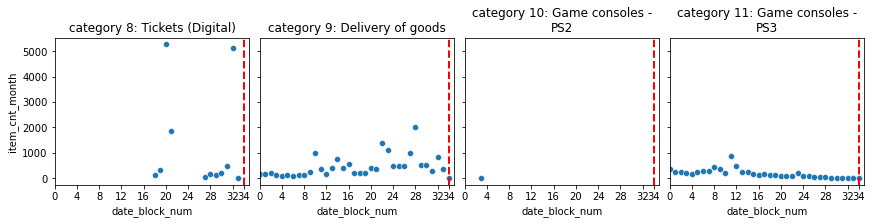

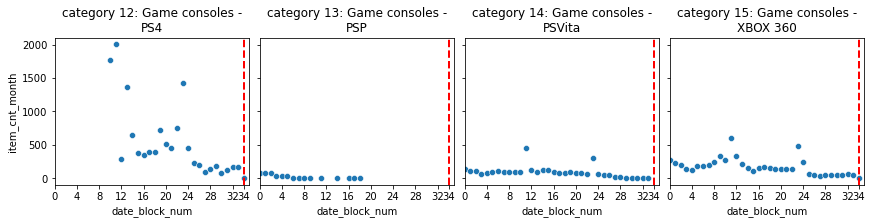

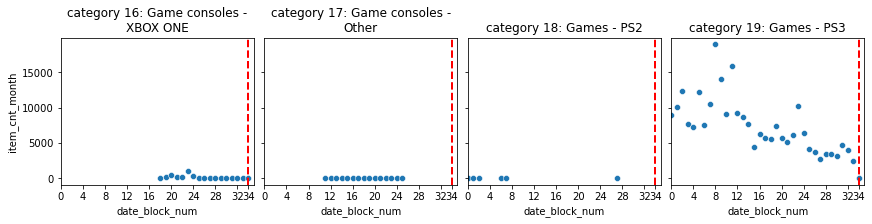

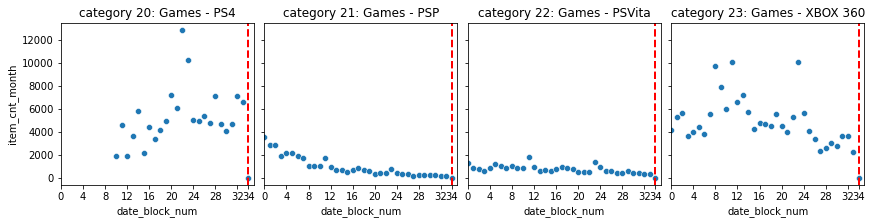

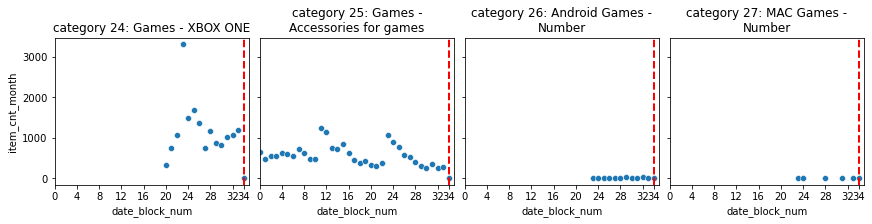

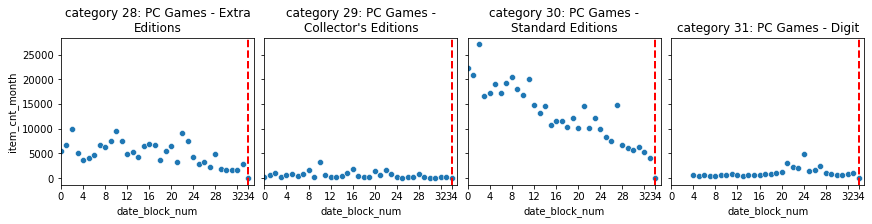

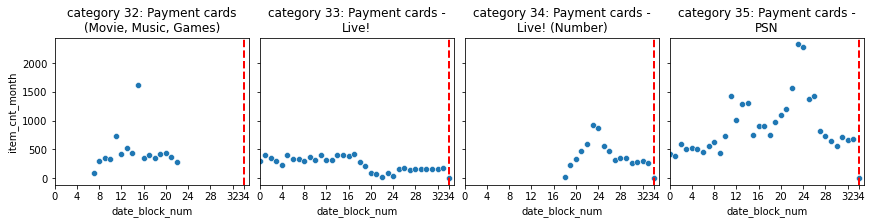

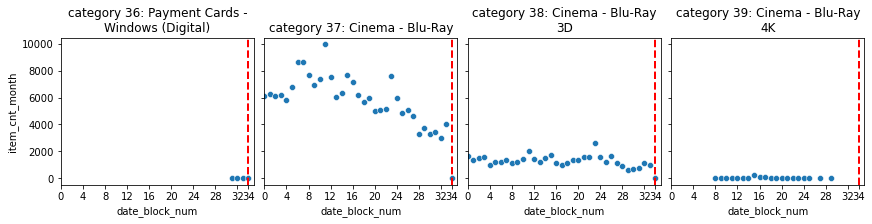

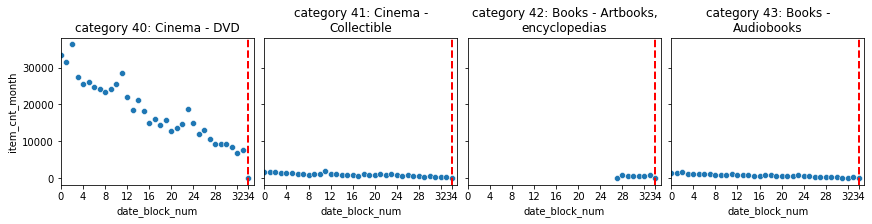

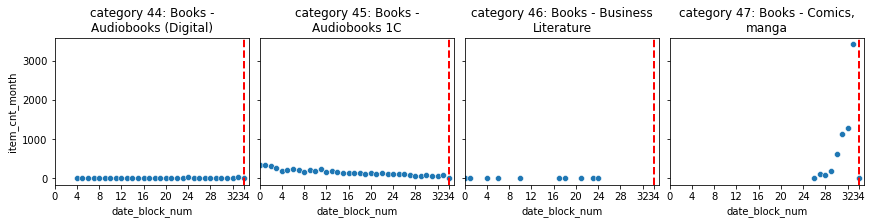

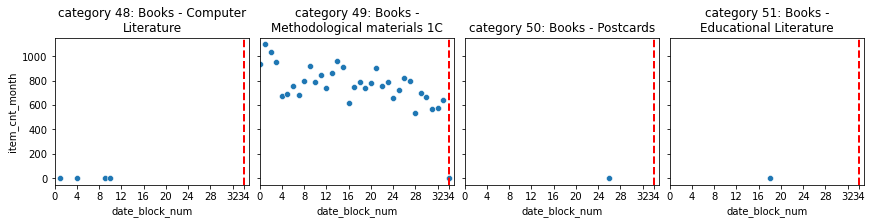

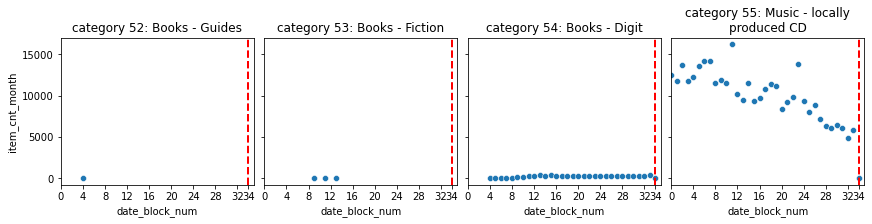

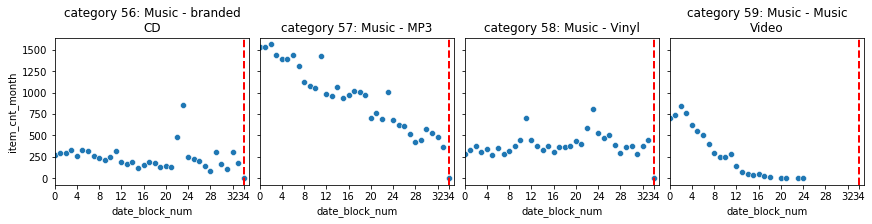

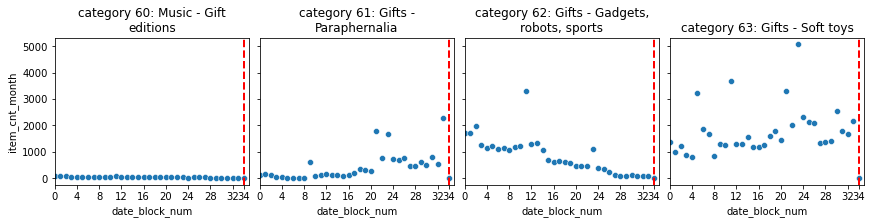

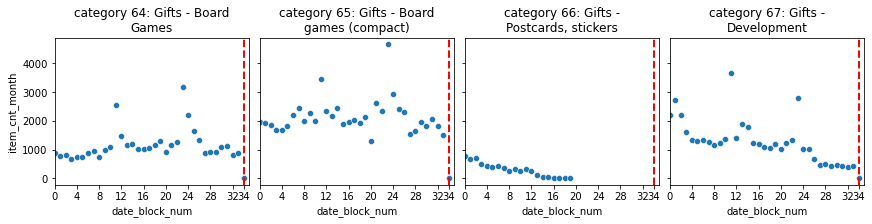

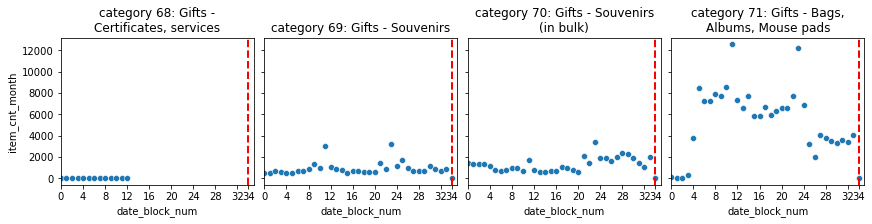

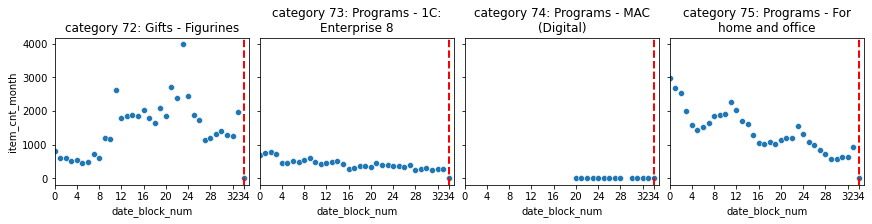

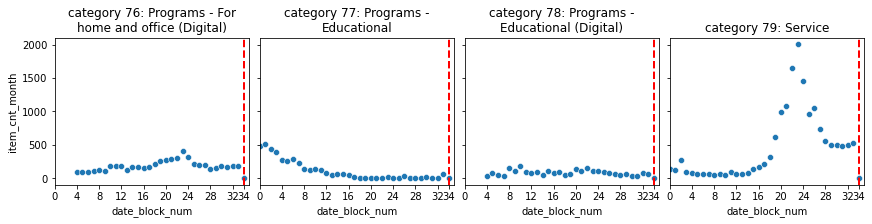

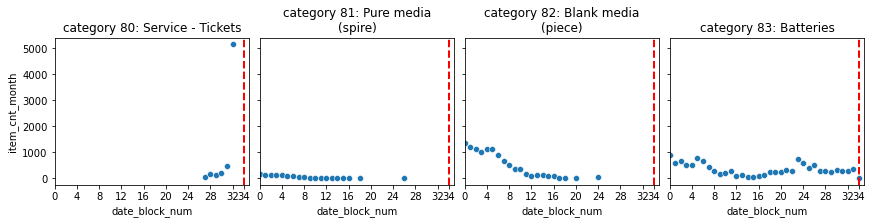

In [52]:
#plot monthly sales for each category

print('ploting monthly sales for each category')
df_groupby = df_all.groupby('item_category_id')
cat_name_list=df_cat['item_category_name'].tolist()


x_ticks=[4*x for x in range(9)] + [34]
columns_in_a_row=4    
max_length = 84
i=0
while i < max_length:
    fig, axs = plt.subplots(1, columns_in_a_row,constrained_layout=True, figsize=(12,3), sharey=True, sharex=True)
    for j in range(columns_in_a_row):
            if i+j < max_length:
                df = df_groupby.get_group(i+j).groupby('date_block_num').agg({'item_cnt_month':'sum'})
                sns.scatterplot(data=df,x='date_block_num' ,y='item_cnt_month', ax=axs[j])
                
                #set x-axis
                axs[j].set_xticks(x_ticks)
                axs[j].set_xlim([0, 35])
               
                #plot month 34, which is the month we need to predict
                axs[j].axvline(34, linewidth=2, ls='dashed', c='red')
                
                #print the shope name
                axs[j].set_title("\n".join(wrap(f'category {i+j}: {cat_name_list[i+j]}', 30)))
           
    i +=columns_in_a_row
    
plt.show()

**Observations**
- Different trends occur in different categories.
- Seasonality are obvious in some categories
- Many categories are no longer for sale, which will be not considered in modelling

In [53]:
""""
#plot category sales for each shop

df_groupby = df_all.groupby('shop_id')
shop_name_list=df_shops['shop_name'].tolist()


x_ticks=[10*x for x in range(9)]
columns_in_a_row=4    
max_length = 60
i=0
while i < max_length:
    fig, axs = plt.subplots(1, columns_in_a_row,constrained_layout=True, figsize=(12,3), sharey=True, sharex=True)
    for j in range(columns_in_a_row):
            if i+j < max_length:
                df = df_groupby.get_group(i+j).groupby('item_category_id').agg({'item_cnt_month':'sum'})
                sns.scatterplot(data=df,x='item_category_id' ,y='item_cnt_month', ax=axs[j])
                
                #set x-axis
                axs[j].set_xticks(x_ticks)
                axs[j].set_xlim([0, 90])
               
                #print the shope name
                axs[j].set_title("\n".join(wrap(f'shop_id:{i+j}, {shop_name_list[i+j]}', 30)))
           
    i +=columns_in_a_row
    
plt.show()
"""

'"\n#plot category sales for each shop\n\ndf_groupby = df_all.groupby(\'shop_id\')\nshop_name_list=df_shops[\'shop_name\'].tolist()\n\n\nx_ticks=[10*x for x in range(9)]\ncolumns_in_a_row=4    \nmax_length = 60\ni=0\nwhile i < max_length:\n    fig, axs = plt.subplots(1, columns_in_a_row,constrained_layout=True, figsize=(12,3), sharey=True, sharex=True)\n    for j in range(columns_in_a_row):\n            if i+j < max_length:\n                df = df_groupby.get_group(i+j).groupby(\'item_category_id\').agg({\'item_cnt_month\':\'sum\'})\n                sns.scatterplot(data=df,x=\'item_category_id\' ,y=\'item_cnt_month\', ax=axs[j])\n                \n                #set x-axis\n                axs[j].set_xticks(x_ticks)\n                axs[j].set_xlim([0, 90])\n               \n                #print the shope name\n                axs[j].set_title("\n".join(wrap(f\'shop_id:{i+j}, {shop_name_list[i+j]}\', 30)))\n           \n    i +=columns_in_a_row\n    \nplt.show()\n'

**Observations**
- not every category was available in every shop
- the sales of each category varid dramatically

In [54]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1823322 entries, 0 to 1823321
Data columns (total 7 columns):
 #   Column            Dtype  
---  ------            -----  
 0   item_id           int64  
 1   date_block_num    int64  
 2   shop_id           int64  
 3   item_category_id  int64  
 4   item_price        float64
 5   item_cnt_month    int32  
 6   is_new_arrival    int32  
dtypes: float64(1), int32(2), int64(4)
memory usage: 83.5 MB


#### EDA the shops and categories shown in df_test

In [55]:
print("Number of shops: ", len(test_shop_list))
print(test_shop_list)

Number of shops:  42
[2, 3, 4, 5, 6, 7, 10, 12, 14, 15, 16, 18, 19, 21, 22, 24, 25, 26, 28, 31, 34, 35, 36, 37, 38, 39, 41, 42, 44, 45, 46, 47, 48, 49, 50, 52, 53, 55, 56, 57, 58, 59]


In [56]:
print("Number of categories: ", len(test_cat_list))
print(test_cat_list)

Number of categories:  62
[0, 2, 3, 5, 6, 7, 9, 11, 12, 15, 16, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 47, 49, 54, 55, 56, 57, 58, 60, 61, 62, 63, 64, 65, 67, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 83]


In [57]:
#action
df_all_filtered = df_all[df_all['shop_id'].isin(test_shop_list) & 
                         df_all['item_category_id'].isin(test_cat_list) &
                         df_all['item_id'].isin(test_item_list)
                        ]
df_all_filtered.sort_values(by=['date_block_num','shop_id','item_category_id'], inplace=True)

C:\Users\olive\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [58]:
df_all_filtered.tail(100)

,item_id,date_block_num,shop_id,item_category_id,item_price,item_cnt_month,is_new_arrival
1761595,1184,34,59,76,0.00,0,1
1761596,1182,34,59,76,"3,490.00",0,0
1761597,1177,34,59,76,954.00,0,0
1761598,1175,34,59,76,990.00,0,0
1761599,1156,34,59,76,"2,390.00",0,0
1761601,927,34,59,76,"3,300.00",0,0
1761625,842,34,59,76,"5,000.00",0,0
1761673,4217,34,59,76,"1,990.00",0,0
1761674,4198,34,59,76,"2,900.00",0,0
1761675,4142,34,59,76,"1,200.00",0,0


ploting monthly sales for each shops shown in df_test


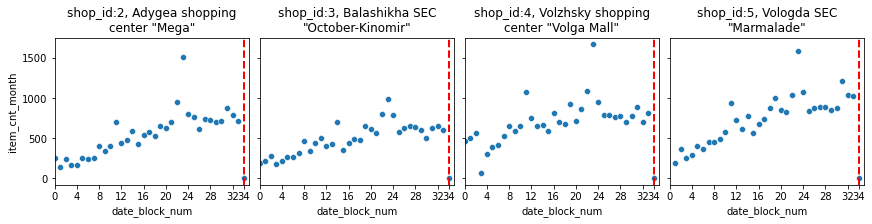

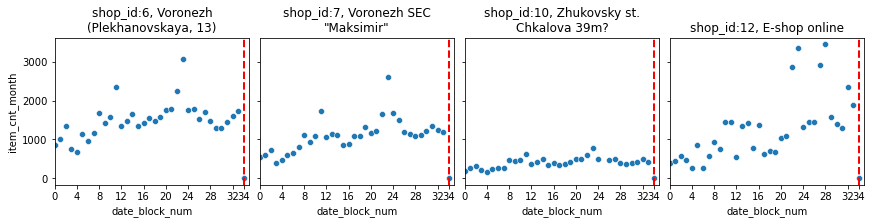

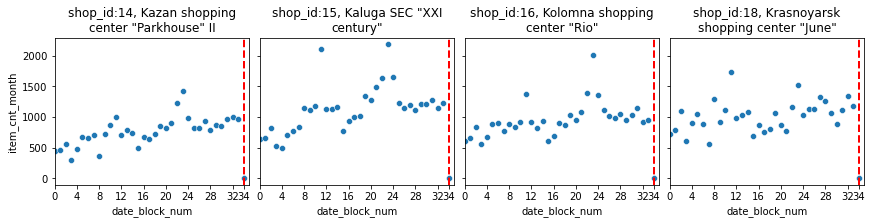

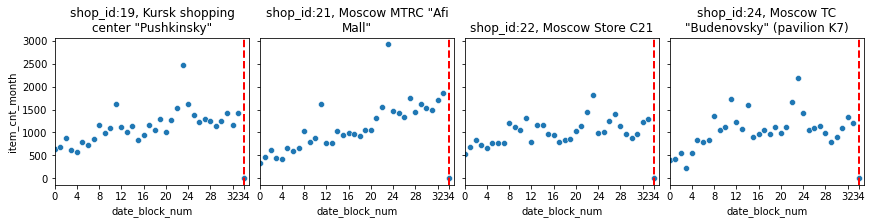

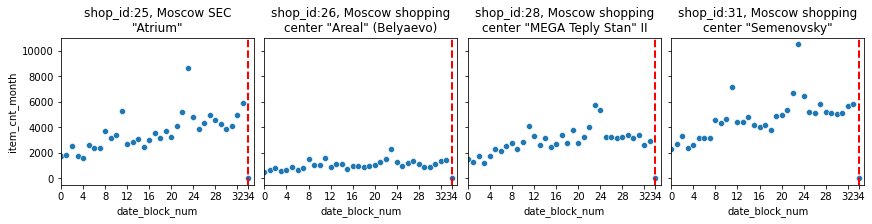

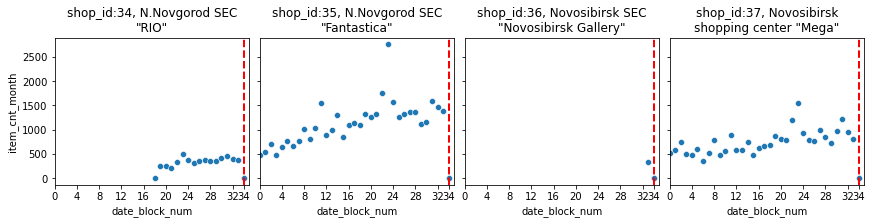

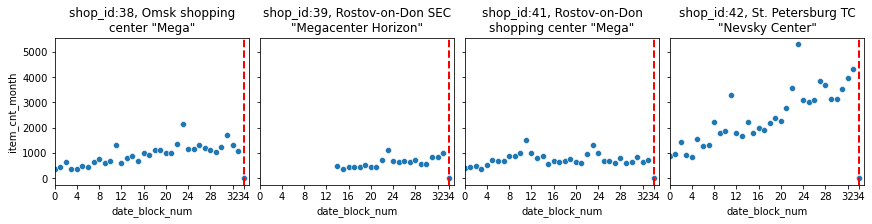

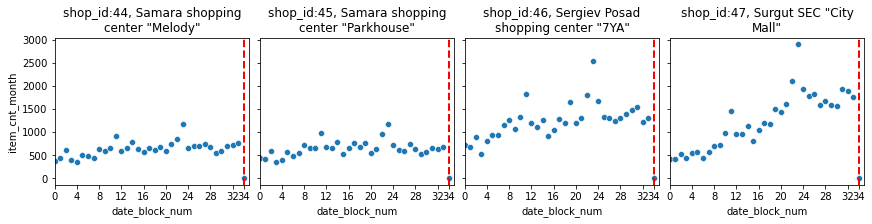

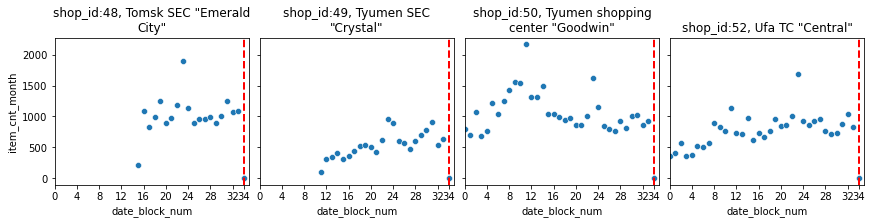

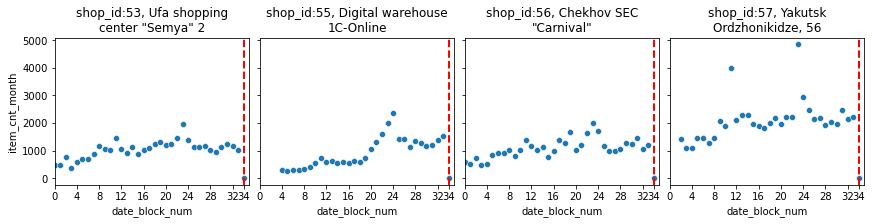

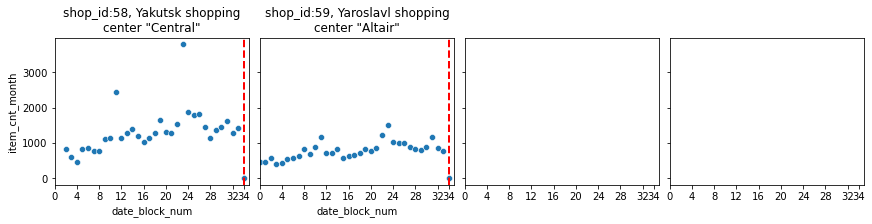

In [59]:
#plot monthly sales for each shops shown in df_test
print('ploting monthly sales for each shops shown in df_test')
df_groupby = df_all_filtered 
shop_name_list=df_shops.loc[df_shops['shop_id'].isin(test_shop_list),'shop_name'].tolist()


x_ticks=[4*x for x in range(9)] + [34]
columns_in_a_row=4    
max_length = len(test_shop_list)
i=0
while i < max_length:
    fig, axs = plt.subplots(1, columns_in_a_row,constrained_layout=True, figsize=(12,3), sharey=True, sharex=True)
    for j in range(columns_in_a_row):
            if i+j < max_length:
                df = df_groupby[df_all_filtered['shop_id']==test_shop_list[i+j]]
                df = df.groupby('date_block_num').agg({'item_cnt_month':'sum'})
                sns.scatterplot(data=df,x='date_block_num' ,y='item_cnt_month', ax=axs[j])
                
                #set x-axis
                axs[j].set_xticks(x_ticks)
                axs[j].set_xlim([0, 35])
                
                #plot month 34, which is the month we need to predict
                axs[j].axvline(34, linewidth=2, ls='dashed', c='red')
               
                #print the shope name
                axs[j].set_title("\n".join(wrap(f'shop_id:{test_shop_list[i+j]}, {shop_name_list[i+j]}', 30)))
           
    i +=columns_in_a_row
    
plt.show()

**observations**
- all shops shown in test data seems to be the ones still operating

ploting monthly sales for each category shown in df_test


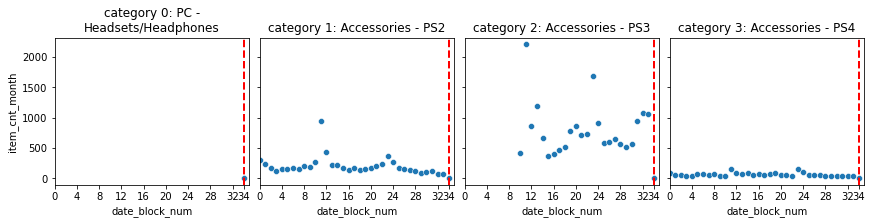

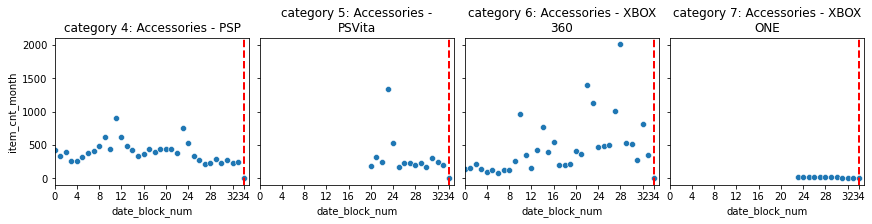

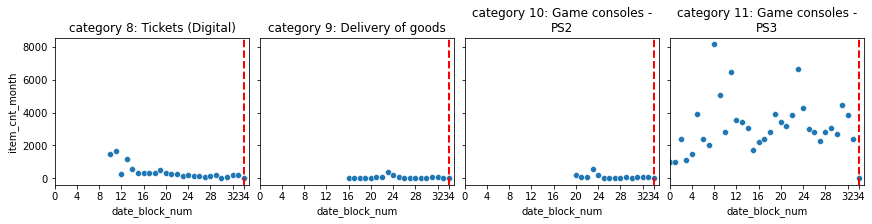

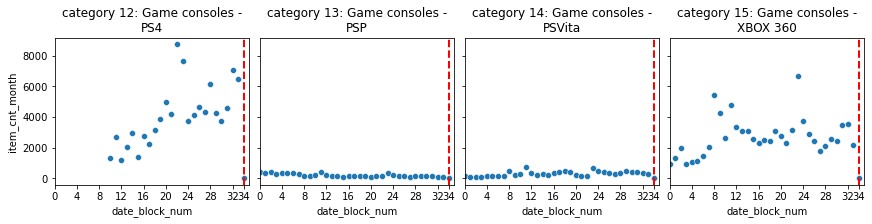

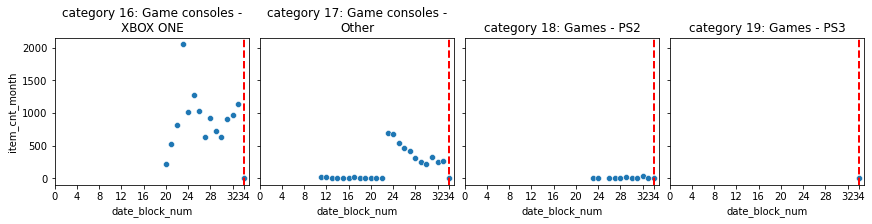

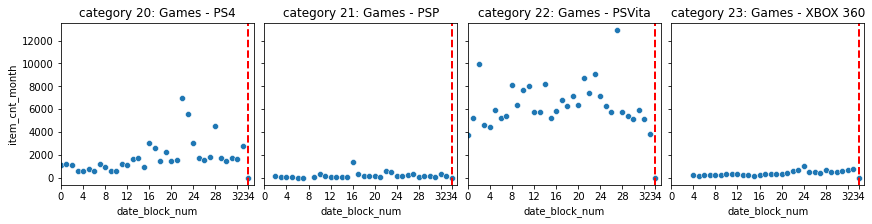

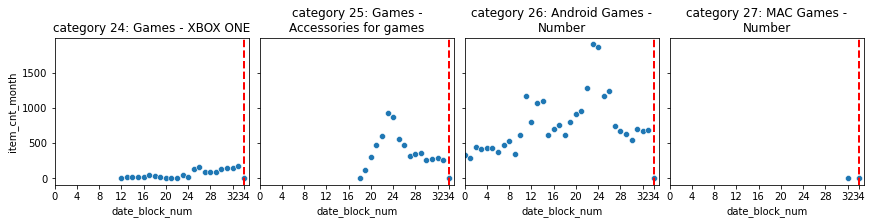

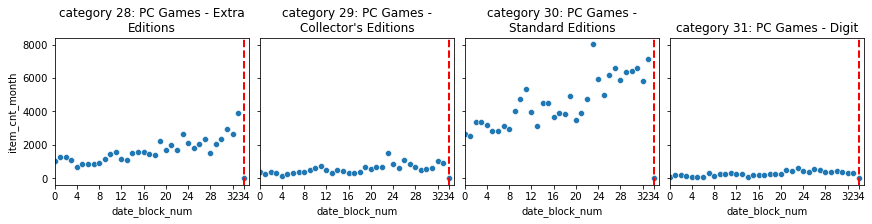

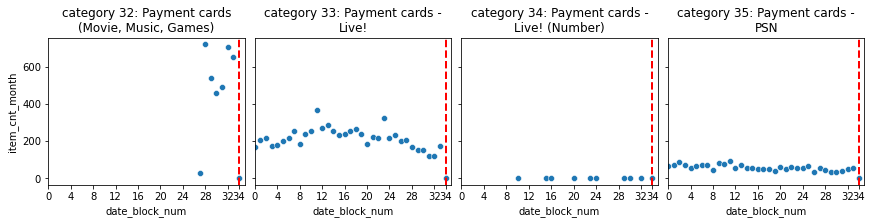

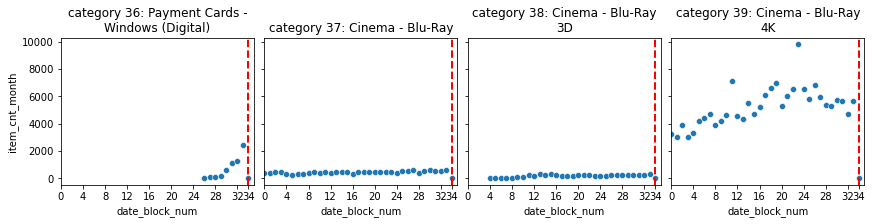

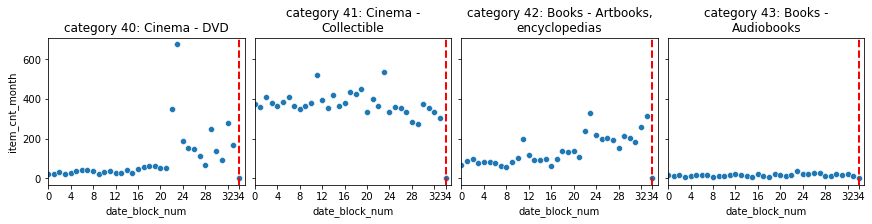

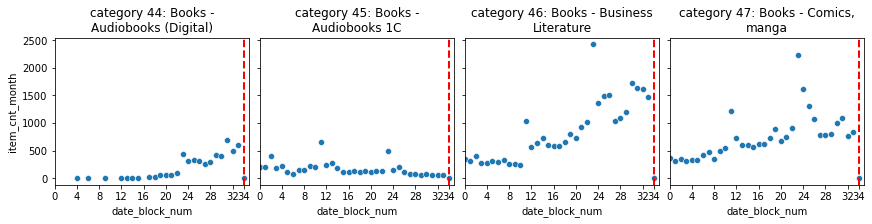

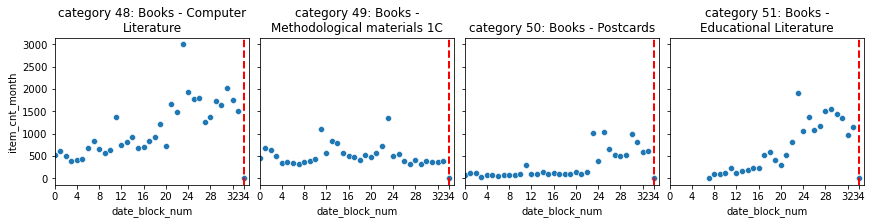

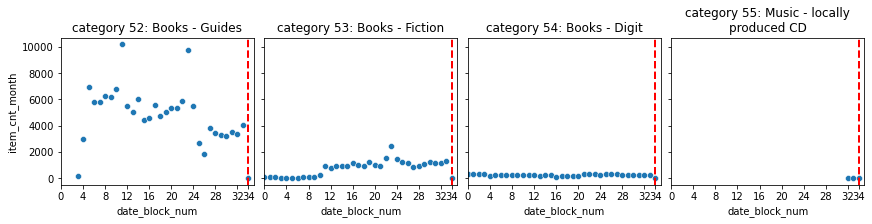

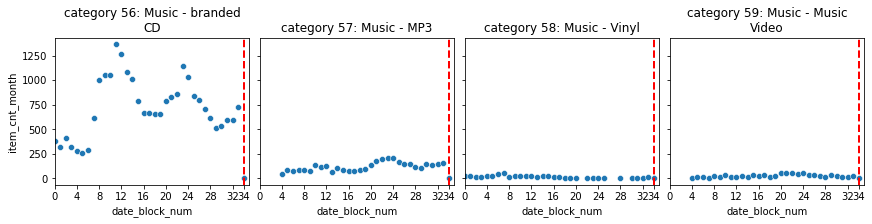

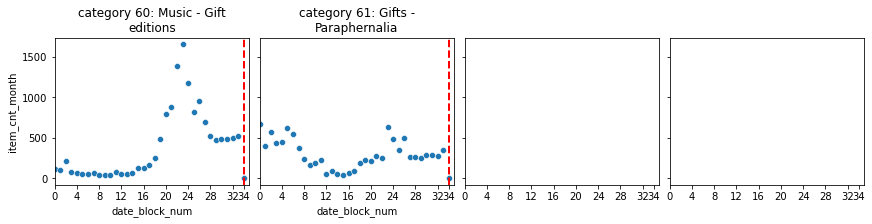

In [60]:
#plot monthly sales for each category

print('ploting monthly sales for each category shown in df_test')
df_groupby = df_all_filtered 
#shop_name_list=df_shops.loc[df_shops['shop_id'].isin(test_shop_list),'shop_name'].tolist()


x_ticks=[4*x for x in range(9)] + [34]
columns_in_a_row=4    
max_length = len(test_cat_list)
i=0
while i < max_length:
    fig, axs = plt.subplots(1, columns_in_a_row,constrained_layout=True, figsize=(12,3), sharey=True, sharex=True)
    for j in range(columns_in_a_row):
            if i+j < max_length:
                df = df_groupby[df_all_filtered['item_category_id']==test_cat_list[i+j]]
                df = df.groupby('date_block_num').agg({'item_cnt_month':'sum'})
                sns.scatterplot(data=df,x='date_block_num' ,y='item_cnt_month', ax=axs[j])
                
                #set x-axis
                axs[j].set_xticks(x_ticks)
                axs[j].set_xlim([0, 35])
                
                #plot month 34, which is the month we need to predict
                axs[j].axvline(34, linewidth=2, ls='dashed', c='red')
               
                #print the shope name
                axs[j].set_title("\n".join(wrap(f'category {i+j}: {cat_name_list[i+j]}', 30)))
           
           
    i +=columns_in_a_row
    
plt.show()

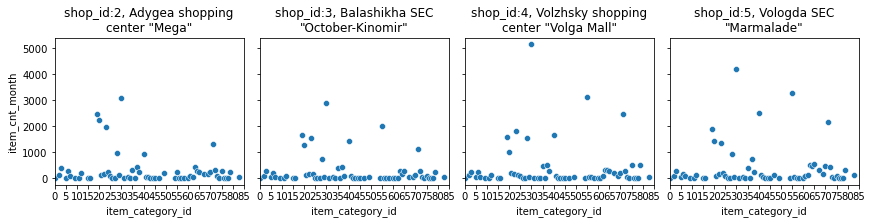

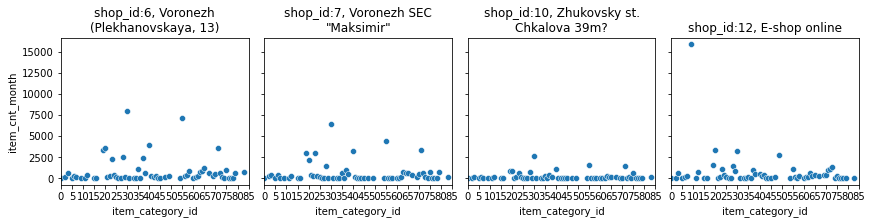

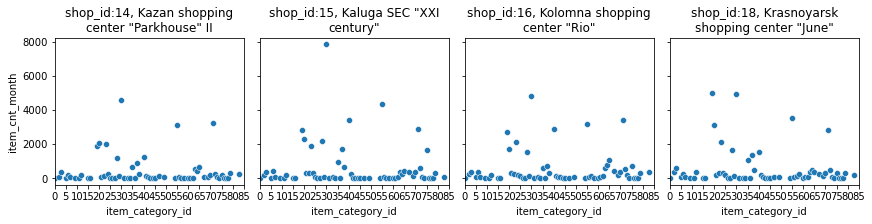

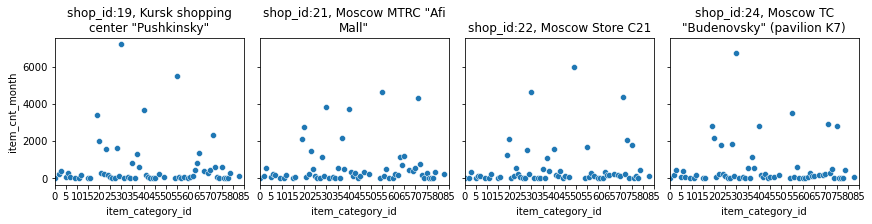

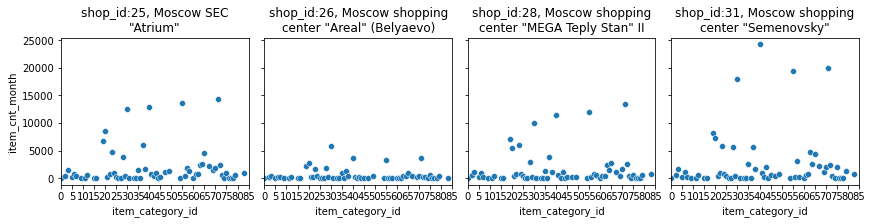

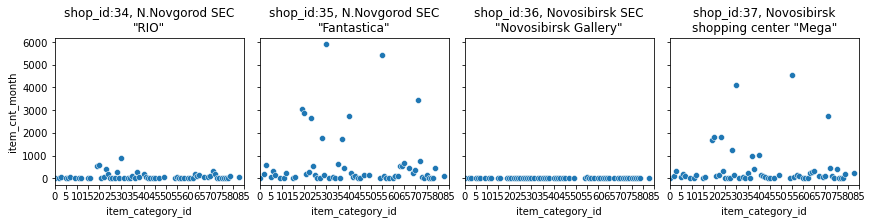

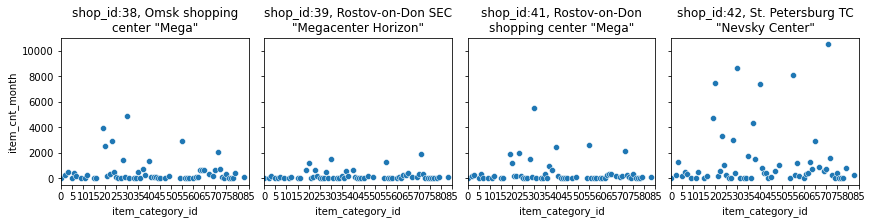

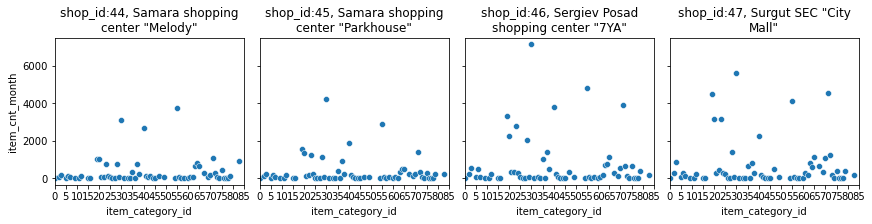

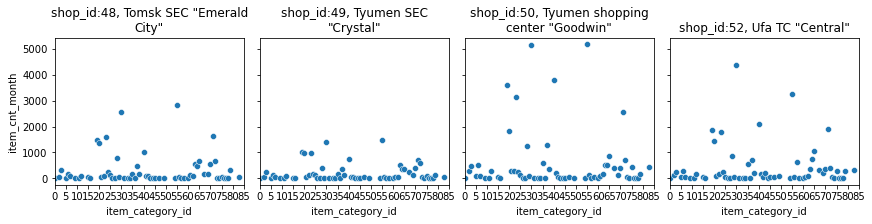

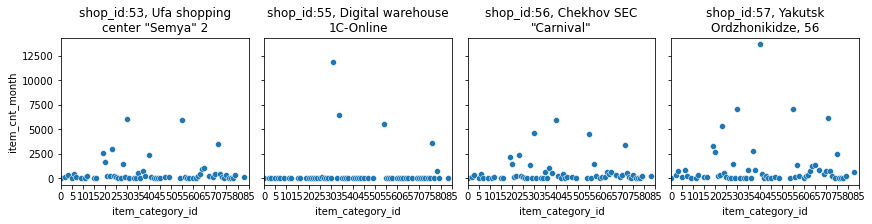

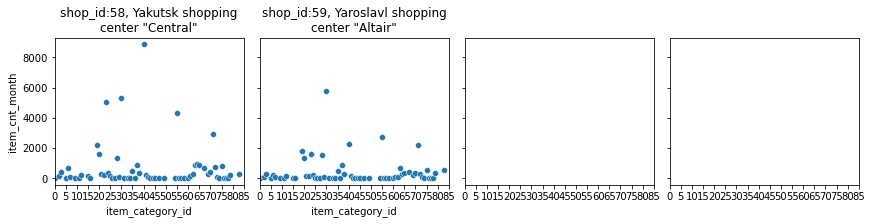

In [61]:
#plot category sales for each shops shown in df_test

df_groupby = df_all_filtered 
shop_name_list=df_shops.loc[df_shops['shop_id'].isin(test_shop_list),'shop_name'].tolist()



x_ticks=[5*x for x in range(len(cat_name_list)//5+2)]
columns_in_a_row=4    
max_length = len(test_shop_list)
i=0
while i < max_length:
    fig, axs = plt.subplots(1, columns_in_a_row,constrained_layout=True, figsize=(12,3), sharey=True, sharex=True)
    for j in range(columns_in_a_row):
            if i+j < max_length:
                df = df_groupby[df_all_filtered['shop_id']==test_shop_list[i+j]]
                df = df.groupby('item_category_id').agg({'item_cnt_month':'sum'})
                sns.scatterplot(data=df,x='item_category_id' ,y='item_cnt_month', ax=axs[j])
                
                #set x-axis
                axs[j].set_xticks(x_ticks)
                axs[j].set_xlim([0, len(cat_name_list)+1])
               
                #print the shope name
                axs[j].set_title("\n".join(wrap(f'shop_id:{test_shop_list[i+j]}, {shop_name_list[i+j]}', 30)))
           
    i +=columns_in_a_row
    
plt.show()

## to FE shops
- group shops into 4 groups?
    - closed
    - downtrend
    - stable
    - uptrend

# Feature engineeing


In [62]:
#pre_process

#step 1: delete index_to_delete=[1163158,2326930,2909818,484683]

# Pickle

In [63]:

#save neccessary object to pickle_dict, which will be pickled in other notebook for feature engineering and modeling
#
pickle_dict1 = dict()
pickle_dict1['df_all']=df_all_filtered   #concat df_train_m and df_test
pickle_dict1['df_train']=df_train
pickle_dict1['df_test']=df_test
pickle_dict1['df_items']=df_items
pickle_dict1['df_shops']=df_shops
pickle_dict1['df_cat']=df_cat
pickle_dict1['new_arrival_item_list'] = new_arrival_item_list


pickle.dump(pickle_dict1, open('../temp/data1.pkl', 'wb'))



In [64]:
df_all_filtered .info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814358 entries, 3920 to 1758355
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   item_id           814358 non-null  int64  
 1   date_block_num    814358 non-null  int64  
 2   shop_id           814358 non-null  int64  
 3   item_category_id  814358 non-null  int64  
 4   item_price        814358 non-null  float64
 5   item_cnt_month    814358 non-null  int32  
 6   is_new_arrival    814358 non-null  int32  
dtypes: float64(1), int32(2), int64(4)
memory usage: 43.5 MB


In [65]:
df_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
0,2013-01-02,0,59,22154,999.00,1.00,37
1,2013-01-03,0,25,2552,899.00,1.00,58
2,2013-01-05,0,25,2552,899.00,-1.00,58
3,2013-01-06,0,25,2554,"1,709.05",1.00,58
4,2013-01-15,0,25,2555,"1,099.00",1.00,56


In [66]:
df_all_filtered .head()

,item_id,date_block_num,shop_id,item_category_id,item_price,item_cnt_month,is_new_arrival
3920,5572,0,2,2,"1,532.86",9,0
3926,5643,0,2,2,"2,387.61",0,0
3936,5583,0,2,5,594.15,2,0
3941,7893,0,2,6,"1,990.00",3,0
3942,7894,0,2,6,"1,490.00",1,0


In [67]:
df_test.duplicated().sum()

0

In [68]:
len(test_item_list)

5100

In [69]:
train_item_list = df_train['item_id'].unique()

In [70]:
len(train_item_list)

21806

In [71]:
df_all_filtered.shape

(814358, 7)